In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arumugasundar007","key":"2e8c7c768e290af709d59603c465a312"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c malware-analysis-hackathon

 94% 128M/137M [00:01<00:00, 97.7MB/s]
100% 137M/137M [00:01<00:00, 95.9MB/s]


In [ ]:
!unzip malware-analysis-hackathon.zip

Archive:  malware-analysis-hackathon.zip
  inflating: evaluation_dataset/evaluation_dataset/evaluation_hardware_trails  
  inflating: evaluation_dataset/evaluation_dataset/evaluation_network_trails  
  inflating: evaluation_dataset/evaluation_dataset/evaluation_os_trails  
  inflating: train_dataset/train_dataset/training_hardware_trails  
  inflating: train_dataset/train_dataset/training_network_trails  
  inflating: train_dataset/train_dataset/training_os_trails  


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/train_dataset/train_dataset/training_os_trails'
df_s1 = pd.read_csv(file_path, sep="," )

In [ ]:
df_s1.head()

,Unnamed: 0,Filename,Operation,Path,Result,Detail,encodedOperation,Length,read,write,...,goal,family_gene,keylog,bkdoor,infosteal,rootkits,method_encoded,goal_encoded,family_encoded,infosteal_encoded
0,0,0e226971d45ce6d098ee17708a600968.csv,Process Profiling,0.0,SUCCESS,"User Time: 0.0000000 seconds, Kernel Time: 0.0...",0,NaN,0,0,...,backdoor,Agent,0,0,0,0,6,2,2,0
1,1,0e226971d45ce6d098ee17708a600968.csv,Thread Exit,0.0,SUCCESS,"Thread ID: 620, User Time: 0.0000000, Kernel T...",2,NaN,0,0,...,backdoor,Agent,0,0,0,0,6,2,2,0
2,2,262c60887082553a6613d51677fdbabb.csv,Process Start,0,SUCCESS,"Parent PID: 1552, Command line: ""C:\Program Fi...",1,NaN,0,0,...,pua,pua,0,0,0,0,2,8,18,0
3,3,262c60887082553a6613d51677fdbabb.csv,Thread Create,0,SUCCESS,Thread ID: 2300,2,NaN,0,0,...,pua,pua,0,0,0,0,2,8,18,0
4,4,262c60887082553a6613d51677fdbabb.csv,QueryNormalizedNameInformationFile,C:\Program Files (x86)\Microsoft\EdgeUpdate\Mi...,SUCCESS,0,9,NaN,0,0,...,pua,pua,0,0,0,0,2,8,18,0


In [ ]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310108 entries, 0 to 2310107
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Filename           object 
 2   Operation          object 
 3   Path               object 
 4   Result             object 
 5   Detail             object 
 6   encodedOperation   int64  
 7   Length             float64
 8   read               int64  
 9   write              int64  
 10  encodedResult      int64  
 11  security           int64  
 12  network            int64  
 13  pathindicator      int64  
 14  option             int64  
 15  sharemodes         int64  
 16  access             int64  
 17  label              int64  
 18  binarylabel        int64  
 19  full_label         object 
 20  method             object 
 21  goal               object 
 22  family_gene        object 
 23  keylog             int64  
 24  bkdoor             int64  
 25  infosteal         

In [ ]:
df_s1['goal'].value_counts()

,count
goal,
pua,1194934
downloader,461960
deceptor,166929
cryptominer,142064
ransomware,129023
normal,121190
spyware,45262
backdoor,40708
banker,8038


In [ ]:
unique_columns = [col for col in df_s1.columns if df_s1[col].nunique() == 1]
print(unique_columns)

['infosteal', 'rootkits', 'infosteal_encoded']


In [ ]:
columns_to_remove = [
    'Unnamed: 0', 'Filename',
    'infosteal', 'rootkits', 'infosteal_encoded',
    'method', 'family_gene',
    'Path', 'Detail', 'goal_encoded' # temperory remove to aviod crashing
    ]

df_s2 = df_s1.drop(columns=columns_to_remove)

In [ ]:
df_s2.head()

,Operation,Result,encodedOperation,Length,read,write,encodedResult,security,network,pathindicator,...,sharemodes,access,label,binarylabel,full_label,goal,keylog,bkdoor,method_encoded,family_encoded
0,Process Profiling,SUCCESS,0,NaN,0,0,1,0,0,0,...,0,0,1,1,MSIL.Agent.R_,backdoor,0,0,6,2
1,Thread Exit,SUCCESS,2,NaN,0,0,1,0,0,0,...,0,0,1,1,MSIL.Agent.R_,backdoor,0,0,6,2
2,Process Start,SUCCESS,1,NaN,0,0,33,0,0,0,...,0,0,50,1,PUA,pua,0,0,2,18
3,Thread Create,SUCCESS,2,NaN,0,0,33,0,0,0,...,0,0,50,1,PUA,pua,0,0,2,18
4,QueryNormalizedNameInformationFile,SUCCESS,9,NaN,0,0,33,0,0,5,...,0,0,50,1,PUA,pua,0,0,2,18


In [ ]:
print(df_s2.columns)

Index(['Operation', 'Result', 'encodedOperation', 'Length', 'read', 'write',
       'encodedResult', 'security', 'network', 'pathindicator', 'option',
       'sharemodes', 'access', 'label', 'binarylabel', 'full_label', 'goal',
       'keylog', 'bkdoor', 'method_encoded', 'family_encoded'],
      dtype='object')


In [ ]:
df_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310108 entries, 0 to 2310107
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Operation         object 
 1   Result            object 
 2   encodedOperation  int64  
 3   Length            float64
 4   read              int64  
 5   write             int64  
 6   encodedResult     int64  
 7   security          int64  
 8   network           int64  
 9   pathindicator     int64  
 10  option            int64  
 11  sharemodes        int64  
 12  access            int64  
 13  label             int64  
 14  binarylabel       int64  
 15  full_label        object 
 16  goal              object 
 17  keylog            int64  
 18  bkdoor            int64  
 19  method_encoded    int64  
 20  family_encoded    int64  
dtypes: float64(1), int64(16), object(4)
memory usage: 370.1+ MB


In [ ]:
print(df_s2['goal'].value_counts())

# 'Operation', 'Path', 'Result', 'Detail', 'encodedOperation', 'Length'
# print(df_s2['Operation'].value_counts())
# print(df_s2['Path'].value_counts())
# print(df_s2['Result'].value_counts())
# print(df_s2['Detail'].value_counts())
# print(df_s2['encodedOperation'].value_counts())
print(df_s2['Length'].value_counts())
# print(df_s2['Length'].isna().sum())
# print(df_s2['Length'].notna().sum())

# print(df_s2['full_label'].value_counts())

goal
pua            1194934
downloader      461960
deceptor        166929
cryptominer     142064
ransomware      129023
normal          121190
spyware          45262
backdoor         40708
banker            8038
Name: count, dtype: int64
Length
16.0        235581
144.0       113134
4.0          93254
12.0         74532
65536.0      55232
             ...  
7961.0           1
313571.0         1
309632.0         1
297030.0         1
295205.0         1
Name: count, Length: 1822, dtype: int64
1433590
876518


In [ ]:
from sklearn.preprocessing import LabelEncoder
# columns_to_encode = ['Operation', 'Path', 'Result', 'Detail', 'full_label']
columns_to_encode = ['Operation', 'Result', 'full_label']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df_s2[col] = label_encoder.fit_transform(df_s2[col])

In [ ]:
df_s2.head()

,Operation,Result,encodedOperation,Length,read,write,encodedResult,security,network,pathindicator,...,sharemodes,access,label,binarylabel,full_label,goal,keylog,bkdoor,method_encoded,family_encoded
0,10,28,0,NaN,0,0,1,0,0,0,...,0,0,1,1,2,backdoor,0,0,6,2
1,68,28,2,NaN,0,0,1,0,0,0,...,0,0,1,1,2,backdoor,0,0,6,2
2,11,28,1,NaN,0,0,33,0,0,0,...,0,0,50,1,3,pua,0,0,2,18
3,67,28,2,NaN,0,0,33,0,0,0,...,0,0,50,1,3,pua,0,0,2,18
4,28,28,9,NaN,0,0,33,0,0,5,...,0,0,50,1,3,pua,0,0,2,18


In [ ]:
print(df_s2.columns, len(df_s2.columns))

Index(['Operation', 'Result', 'encodedOperation', 'Length', 'read', 'write',
       'encodedResult', 'security', 'network', 'pathindicator', 'option',
       'sharemodes', 'access', 'label', 'binarylabel', 'full_label', 'goal',
       'keylog', 'bkdoor', 'method_encoded', 'family_encoded'],
      dtype='object') 21


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# For accuracy test purpose

# Features (excluding the target variable)
X = df_s2.drop(columns=['goal'])  # Drop the target and non-numeric columns if needed

# Target variable
y = df_s2['goal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00     12190
      banker       1.00      1.00      1.00      2347
 cryptominer       1.00      1.00      1.00     42915
    deceptor       1.00      1.00      1.00     50099
  downloader       1.00      1.00      1.00    138525
      normal       1.00      1.00      1.00     36269
         pua       1.00      1.00      1.00    358436
  ransomware       1.00      1.00      1.00     38609
     spyware       1.00      1.00      1.00     13643

    accuracy                           1.00    693033
   macro avg       1.00      1.00      1.00    693033
weighted avg       1.00      1.00      1.00    693033



In [ ]:
file_path = '/content/evaluation_dataset/evaluation_dataset/evaluation_os_trails'
ev_df = pd.read_csv(file_path)

In [ ]:
ev_df.head()

,Unnamed: 0,Filename,Operation,Path,Result,Detail,encodedOperation,Length,read,write,...,method,family_gene,keylog,bkdoor,infosteal,rootkits,method_encoded,goal_encoded,family_encoded,infosteal_encoded
0,0,c5b1e4d675be2758c0ae1860a206bfce.csv,Process Profiling,0.0,SUCCESS,"User Time: 0.0312500 seconds, Kernel Time: 0.0...",0,NaN,0,0,...,trojan,Coinminer,0,0,0,0,2,4,24,0
1,1,c5b1e4d675be2758c0ae1860a206bfce.csv,Thread Create,0.0,SUCCESS,Thread ID: 3868,2,NaN,0,0,...,trojan,Coinminer,0,0,0,0,2,4,24,0
2,2,c5b1e4d675be2758c0ae1860a206bfce.csv,Thread Exit,0.0,SUCCESS,"Thread ID: 2284, User Time: 0.0000000, Kernel ...",2,NaN,0,0,...,trojan,Coinminer,0,0,0,0,2,4,24,0
3,3,ea3c22678beeb0dba537a59a62eddae2.csv,Thread Exit,0,SUCCESS,"Thread ID: 2988, User Time: 0.0000000, Kernel ...",2,NaN,0,0,...,trojan,Coinminer,0,0,0,0,2,4,24,0
4,4,ea3c22678beeb0dba537a59a62eddae2.csv,QueryNormalizedNameInformationFile,C:\Profiler_OS_NW\ea3c22678beeb0dba537a59a62ed...,SUCCESS,0,9,NaN,0,0,...,trojan,Coinminer,0,0,0,0,2,4,24,0


In [ ]:
# For model submission

# Features (excluding the target variable)
X = df_s2.drop(columns=['goal'])  # Drop the target and non-numeric columns if needed

# Target variable
y = df_s2['goal']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X, y)

columns_to_use = ['Operation', 'Result', 'encodedOperation', 'Length', 'read', 'write',
       'encodedResult', 'security', 'network', 'pathindicator', 'option',
       'sharemodes', 'access', 'label', 'binarylabel', 'full_label',
       'keylog', 'bkdoor', 'method_encoded', 'family_encoded']

test_df = ev_df[columns_to_use]
columns_to_encode = ['Operation', 'Result', 'full_label']
label_encoder = LabelEncoder()
for col in columns_to_encode:
    test_df[col] = label_encoder.fit_transform(test_df[col])

X_test = test_df

# Make predictions
y_pred = rf_classifier.predict(X_test)

print(y_pred)

<ipython-input-25-1d8013a5dcc7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = label_encoder.fit_transform(test_df[col])
<ipython-input-25-1d8013a5dcc7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = label_encoder.fit_transform(test_df[col])
<ipython-input-25-1d8013a5dcc7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

['cryptominer' 'cryptominer' 'cryptominer' ... 'normal' 'normal' 'normal']


In [ ]:
num_records = ev_df.shape[0]
print(num_records, len(y_pred))

356451 356451


In [ ]:
df = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),  # Create a sequence of IDs starting from 1
    'Goal': y_pred
})

# Save the DataFrame to a CSV file
df.to_csv('submission_os.csv', index=False)

from google.colab import files
files.download('submission_os.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
file_path = '/content/train_dataset/train_dataset/training_os_trails'
tf_df = pd.read_csv(file_path, sep="," )

In [ ]:
columns_to_remove = [
    'Unnamed: 0', 'Filename',
    'infosteal', 'rootkits', 'infosteal_encoded',
    'method', 'family_gene',
    'Path', 'Detail', # temperory remove to aviod crashing
    ]
tf_df = tf_df.drop(columns=columns_to_remove)

columns_to_encode = ['Operation', 'Result', 'full_label']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    tf_df[col] = label_encoder.fit_transform(tf_df[col])

In [ ]:
tf_df.columns

Index(['Operation', 'Result', 'encodedOperation', 'Length', 'read', 'write',
       'encodedResult', 'security', 'network', 'pathindicator', 'option',
       'sharemodes', 'access', 'label', 'binarylabel', 'full_label', 'goal',
       'keylog', 'bkdoor', 'method_encoded', 'goal_encoded', 'family_encoded'],
      dtype='object')

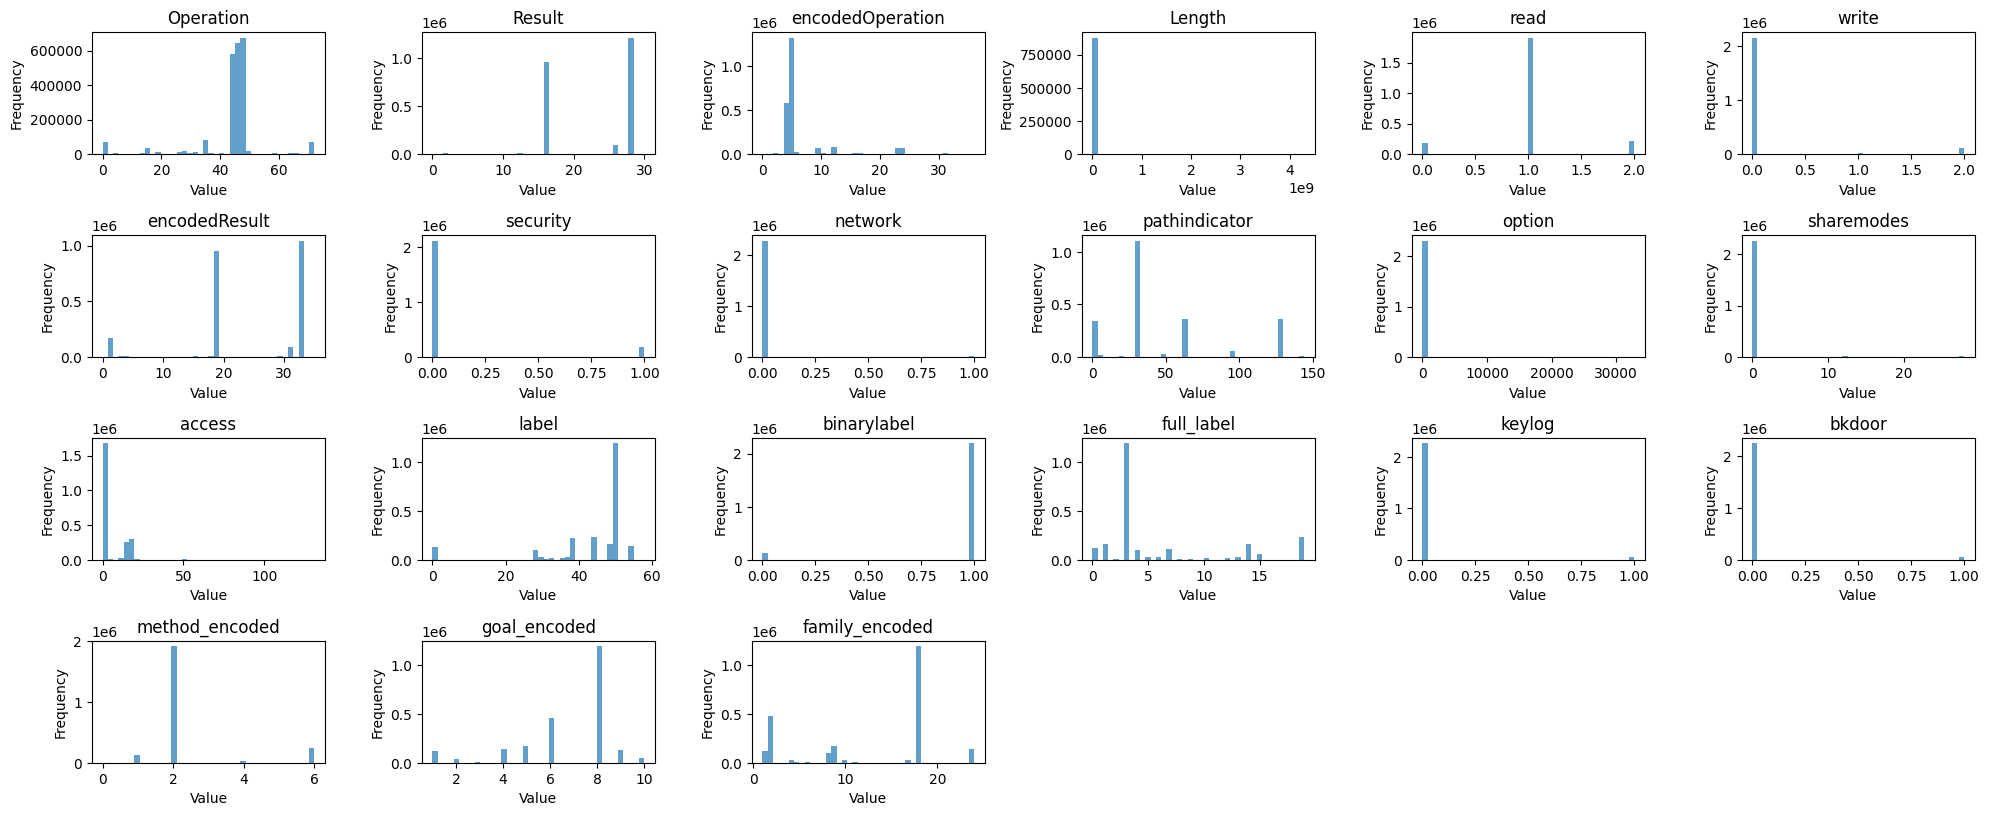

In [ ]:
features = tf_df.drop(columns=['goal']).columns

# Set up the number of rows and columns for subplots
n_rows = 10   # Number of rows for subplots
n_cols = 6    # Number of columns for subplots

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust size based on features

# Flatten the axes array to easily index them
axes = axes.flatten()

# Loop through each feature and plot a histogram in the corresponding subplot
for i, feature in enumerate(features):
    axes[i].hist(tf_df[feature], bins=40, alpha=0.7, label=feature)
    axes[i].set_title(feature)  # Set title for each feature
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots that don't have any data
for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes[i])

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
X = tf_df.drop(columns=['goal']).values
y = tf_df['goal'].values

X,y

(array([[10., 28.,  0., ...,  6.,  2.,  2.],
        [68., 28.,  2., ...,  6.,  2.,  2.],
        [11., 28.,  1., ...,  2.,  8., 18.],
        ...,
        [68., 28.,  2., ...,  2.,  5.,  9.],
        [10., 28.,  0., ...,  6.,  2.,  2.],
        [68., 28.,  2., ...,  6.,  2.,  2.]]),
 array(['backdoor', 'backdoor', 'pua', ..., 'deceptor', 'backdoor',
        'backdoor'], dtype=object))

In [ ]:
X.shape, y.shape

((2310108, 21), (2310108,))

In [ ]:
# also try excluding this

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# data = np.hstack((X, np.reshape(y, (-1,1))))
# tf_df = pd.DataFrame(data, columns=tf_df.columns)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


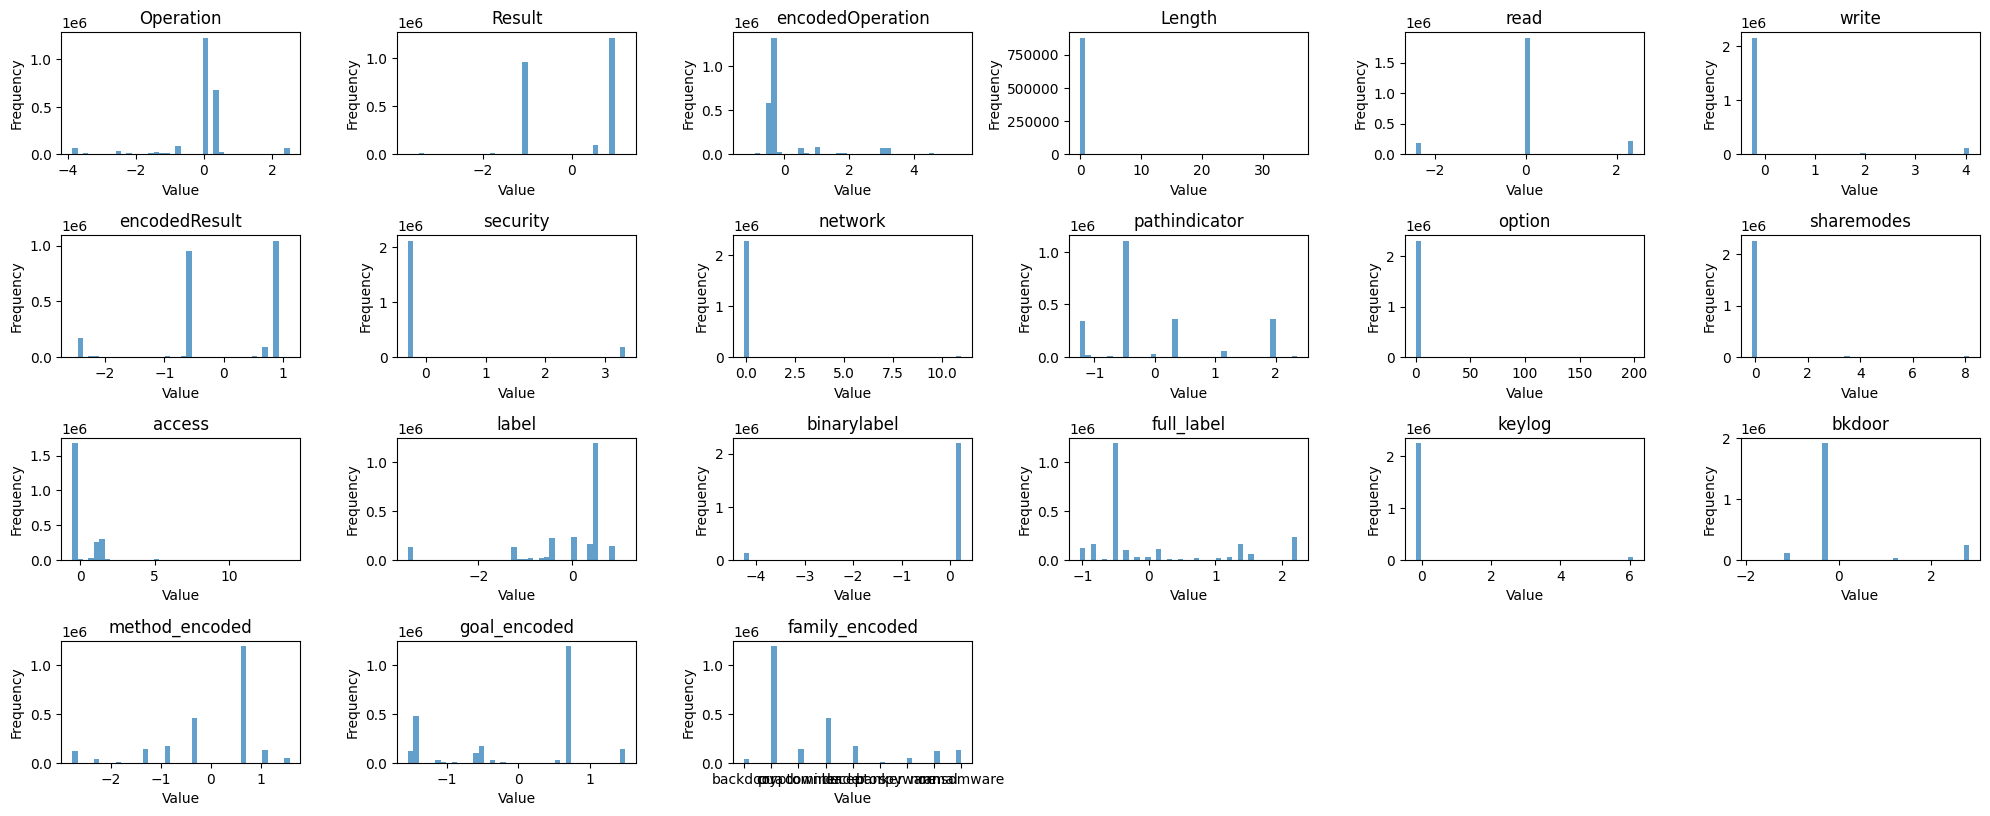

In [ ]:
features = tf_df.drop(columns=['goal']).columns

# Set up the number of rows and columns for subplots
n_rows = 10   # Number of rows for subplots
n_cols = 6    # Number of columns for subplots

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust size based on features

# Flatten the axes array to easily index them
axes = axes.flatten()

# Loop through each feature and plot a histogram in the corresponding subplot
for i, feature in enumerate(features):
    axes[i].hist(tf_df[feature], bins=40, alpha=0.7, label=feature)
    axes[i].set_title(feature)  # Set title for each feature
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots that don't have any data
for i in range(len(features), n_rows * n_cols):
    fig.delaxes(axes[i])

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
X, y

(array([[10., 28.,  0., ...,  6.,  2.,  2.],
        [68., 28.,  2., ...,  6.,  2.,  2.],
        [11., 28.,  1., ...,  2.,  8., 18.],
        ...,
        [68., 28.,  2., ...,  2.,  5.,  9.],
        [10., 28.,  0., ...,  6.,  2.,  2.],
        [68., 28.,  2., ...,  6.,  2.,  2.]]),
 array(['backdoor', 'backdoor', 'pua', ..., 'deceptor', 'backdoor',
        'backdoor'], dtype=object))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert target to numerical form
y_test = label_encoder.transform(y_test)

In [ ]:
y_train, y_test

(array([4, 6, 4, ..., 6, 7, 7]), array([6, 6, 3, ..., 4, 6, 7]))

In [ ]:
num_classes=9
model = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
50534/50534 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.0176 - loss: nan - val_accuracy: 0.0176 - val_loss: nan
Epoch 2/5
50534/50534 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - accuracy: 0.0176 - loss: nan - val_accuracy: 0.0176 - val_loss: nan
Epoch 3/5
50534/50534 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - accuracy: 0.0177 - loss: nan - val_accuracy: 0.0176 - val_loss: nan
Epoch 4/5
50534/50534 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.0177 - loss: nan - val_accuracy: 0.0176 - val_loss: nan
Epoch 5/5
50534/50534 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.0177 - loss: nan - val_accuracy: 0.0176 - val_loss: nan


In [ ]:
model.evaluate(X_test, y_test)

21658/21658 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.0176 - loss: nan


[nan, 0.017589349299669266]

In [ ]:
file_path = '/content/evaluation_dataset/evaluation_dataset/evaluation_os_trails'
ev_df = pd.read_csv(file_path, sep="," )

In [ ]:
columns_to_use = ['Operation', 'Result', 'encodedOperation', 'Length', 'read', 'write',
       'encodedResult', 'security', 'network', 'pathindicator', 'option',
       'sharemodes', 'access', 'label', 'binarylabel', 'full_label',
       'keylog', 'bkdoor', 'method_encoded', 'goal_encoded', 'family_encoded']

ev_df = ev_df[columns_to_use]

columns_to_encode = ['Operation', 'Result', 'full_label']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    ev_df[col] = label_encoder.fit_transform(ev_df[col])

ev_X = ev_df.values
# ev_X = scaler.fit_transform(ev_X)

y_pred = model.predict(ev_X)
y_pred_numeric = np.array(np.argmax(y_pred, axis=1))
y_pred_labels = label_encoder.inverse_transform(y_pred_numeric)

df = pd.DataFrame({
    'Id': range(1, len(y_pred) + 1),  # Create a sequence of IDs starting from 1
    'Goal': y_pred_labels
})

# Save the DataFrame to a CSV file
df.to_csv('submission_os.csv', index=False)

from google.colab import files
files.download('submission_os.csv')

<ipython-input-43-c08e8d3d802f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df[col] = label_encoder.fit_transform(ev_df[col])
<ipython-input-43-c08e8d3d802f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df[col] = label_encoder.fit_transform(ev_df[col])
<ipython-input-43-c08e8d3d802f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

11140/11140 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>